<a href="https://colab.research.google.com/github/HamzahMadi4105/MachineLearning/blob/main/HW4P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
file_path = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [143]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [144]:
X = housing.iloc[:, 1:11].values
Y = housing.iloc[:, 0].values
m = len(Y)  # Number of training examples
n = len(X)  # Number of training examples
housing.head()
print(X.shape)

(545, 10)


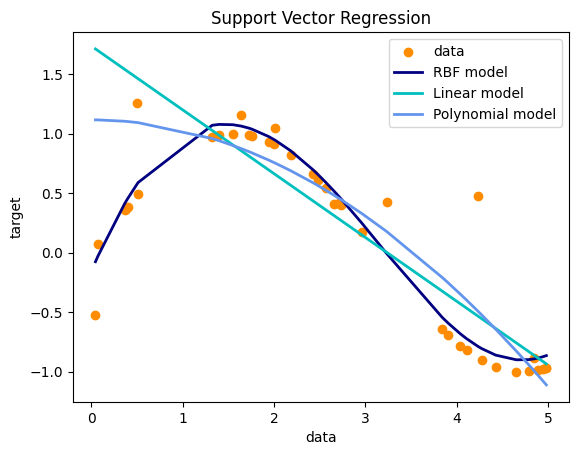

In [145]:
x = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(x).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(x, y).predict(x)
y_lin = svr_lin.fit(x, y).predict(x)
y_poly = svr_poly.fit(x, y).predict(x)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(x, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(x, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [146]:

def linear_model_training_pca(X, Y):
    n=X.shape[1]
    mse_list = []
    k_list=[]
    for i in range(n):
        print("Current iteration:", i + 1)
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

        classifier = SVR(kernel = 'rbf', C = 1E2)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        Y_pred_svm = classifier.predict(X_test)
        mse_list.append(mean_squared_error(y_test, Y_pred))
        k_list.append(i+1)

    best_mse = max(mse_list)
    best_k = mse_list.index(best_mse) + 1
    print("----------------")
    print("Highest Accuracy Score Achieved: " + str(best_mse) + " for K number = " + str(best_k))

    return k_list, mse_list


In [147]:
sc_X = StandardScaler()
housingset = pd.DataFrame(X)
X = sc_X.fit_transform(housingset)

In [148]:
Y =Y.reshape(-1,1)
Y1= sc_X.fit_transform(Y)

In [149]:
k_list, mse_scores = linear_model_training_pca(X, Y1)

Current iteration: 1
K = 1
Current iteration: 2
K = 2
Current iteration: 3
K = 3
Current iteration: 4
K = 4
Current iteration: 5
K = 5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Current iteration: 6
K = 6
Current iteration: 7
K = 7
Current iteration: 8
K = 8
Current iteration: 9
K = 9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Current iteration: 10
K = 10
----------------
Highest Accuracy Score Achieved: 0.7074167437040603 for K number = 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
def plot_result_with_k(k_list,mse_scores):
    plt.plot(k_list, mse_scores, label = "MSE")
    plt.legend()
    plt.title('Plotting  Mean Square Error a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

RBF

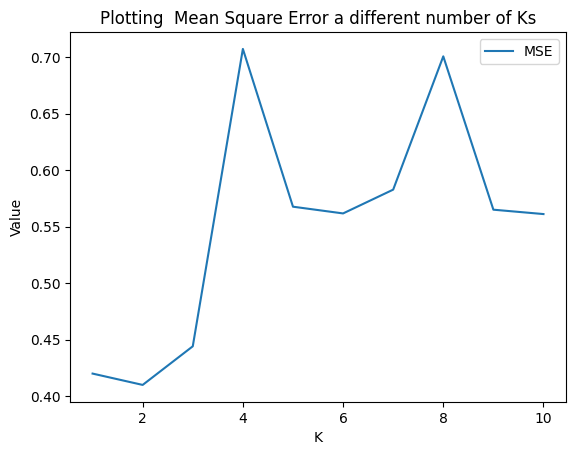

In [151]:
plot_result_with_k(k_list, mse_scores)

In [152]:

def linear_model_training_pca(X, Y):
    n=X.shape[1]
    mse_list = []
    k_list=[]
    for i in range(n):
        print("Current iteration:", i + 1)
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9)

        classifier = SVR(kernel = 'linear', C = 1E2)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        Y_pred_svm = classifier.predict(X_test)
        mse_list.append(mean_squared_error(y_test, Y_pred))
        k_list.append(i+1)

    best_mse = max(mse_list)
    best_k = mse_list.index(best_mse) + 1
    print("----------------")
    print("Highest Accuracy Score Achieved: " + str(best_mse) + " for K number = " + str(best_k))

    return k_list, mse_list

In [153]:
k_list, mse_scores = linear_model_training_pca(X, Y1)

Current iteration: 1
K = 1
Current iteration: 2
K = 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 3
K = 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 4
K = 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 5
K = 5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 6
K = 6


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 7
K = 7


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 8
K = 8


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 9
K = 9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 10
K = 10


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------
Highest Accuracy Score Achieved: 0.43414109971184933 for K number = 9


Linear

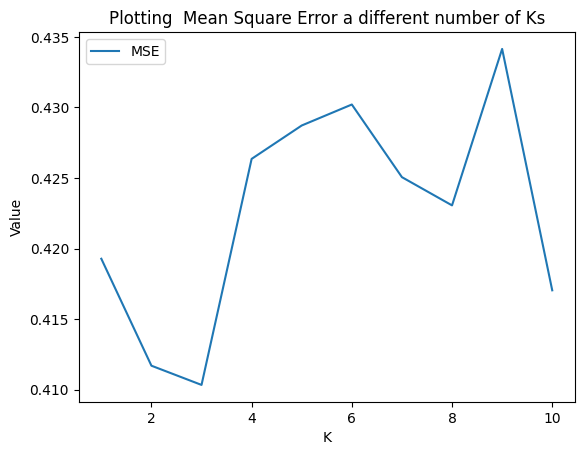

In [154]:
plot_result_with_k(k_list, mse_scores)

In [155]:
def linear_model_training_pca(X, Y):
    n=X.shape[1]
    mse_list = []
    k_list=[]
    for i in range(n):
        print("Current iteration:", i + 1)
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

        classifier = SVR(kernel = 'sigmoid', C = 1E2)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        Y_pred_svm = classifier.predict(X_test)
        mse_list.append(mean_squared_error(y_test, Y_pred))
        k_list.append(i+1)

    best_mse = max(mse_list)
    best_k = mse_list.index(best_mse) + 1
    print("----------------")
    print("Highest Accuracy Score Achieved: " + str(best_mse) + " for K number = " + str(best_k))

    return k_list, mse_list

In [156]:
k_list, mse_scores = linear_model_training_pca(X, Y1)

Current iteration: 1
K = 1
Current iteration: 2
K = 2
Current iteration: 3
K = 3
Current iteration: 4
K = 4
Current iteration: 5
K = 5
Current iteration: 6
K = 6
Current iteration: 7
K = 7
Current iteration: 8
K = 8
Current iteration: 9
K = 9
Current iteration: 10
K = 10
----------------
Highest Accuracy Score Achieved: 4152625.918929583 for K number = 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Sigmoid

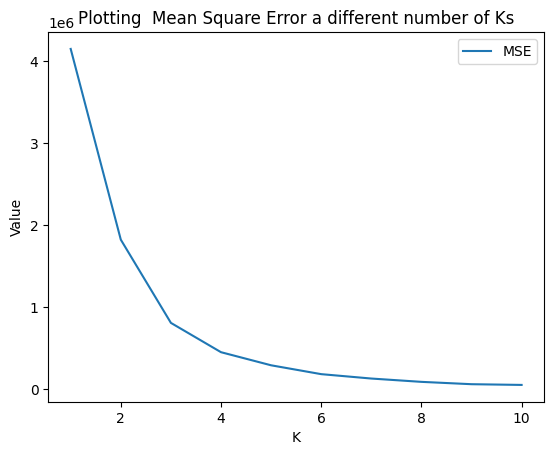

In [157]:
plot_result_with_k(k_list, mse_scores)

In [158]:
def linear_model_training_pca(X, Y):
    n=X.shape[1]
    mse_list = []
    k_list=[]
    for i in range(n):
        print("Current iteration:", i + 1)
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

        classifier = SVR(kernel = 'poly', C = 1E2)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        Y_pred_svm = classifier.predict(X_test)
        mse_list.append(mean_squared_error(y_test, Y_pred))
        k_list.append(i+1)

    best_mse = max(mse_list)
    best_k = mse_list.index(best_mse) + 1
    print("----------------")
    print("Highest Accuracy Score Achieved: " + str(best_mse) + " for K number = " + str(best_k))

    return k_list, mse_list

In [159]:
k_list, mse_scores = linear_model_training_pca(X, Y1)

Current iteration: 1
K = 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 2
K = 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 3
K = 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 4
K = 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 5
K = 5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 6
K = 6


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 7
K = 7


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 8
K = 8


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 9
K = 9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Current iteration: 10
K = 10


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------
Highest Accuracy Score Achieved: 15.58993079576993 for K number = 10


Poly

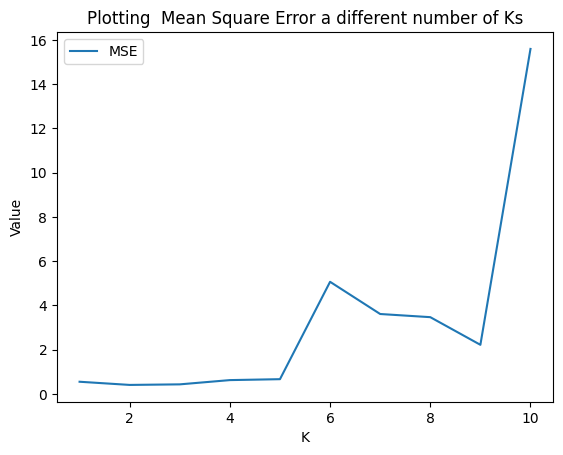

In [160]:
plot_result_with_k(k_list, mse_scores)

In [161]:
def linear_model_training_pca(X, Y):
    n=X.shape[1]
    mse_list = []
    k_list=[]
    for i in range(n):
        print("Current iteration:", i + 1)
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

       #classifier = SVR(kernel = 'rbf', C = 1E2)
        classifier = LinearRegression()
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        Y_pred_svm = classifier.predict(X_test)
        mse_list.append(mean_squared_error(y_test, Y_pred))
        k_list.append(i+1)

    best_mse = min(mse_list)
    best_k = mse_list.index(best_mse) + 1
    print("----------------")
    print("Highest Accuracy Score Achieved: " + str(best_mse) + " for K number = " + str(best_k))

    return k_list, mse_list

In [162]:
k_list, mse_scores = linear_model_training_pca(X, Y1)

Current iteration: 1
K = 1
Current iteration: 2
K = 2
Current iteration: 3
K = 3
Current iteration: 4
K = 4
Current iteration: 5
K = 5
Current iteration: 6
K = 6
Current iteration: 7
K = 7
Current iteration: 8
K = 8
Current iteration: 9
K = 9
Current iteration: 10
K = 10
----------------
Highest Accuracy Score Achieved: 0.3906359984100339 for K number = 8


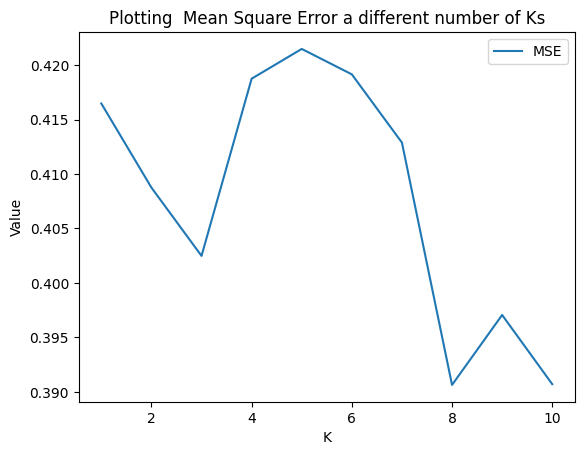

In [163]:
plot_result_with_k(k_list, mse_scores)